In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
#oliv

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv["data"].shape

(400, 4096)

In [6]:
oliv["images"].shape

(400, 64, 64)

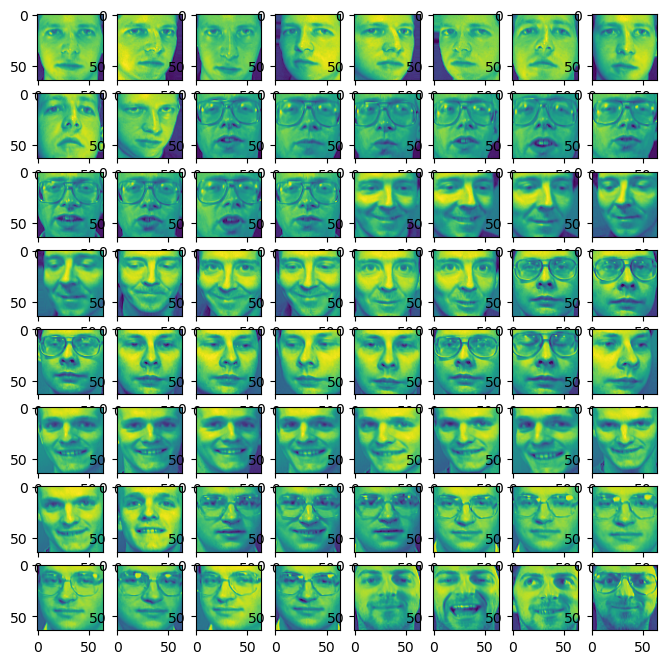

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i])
plt.show()

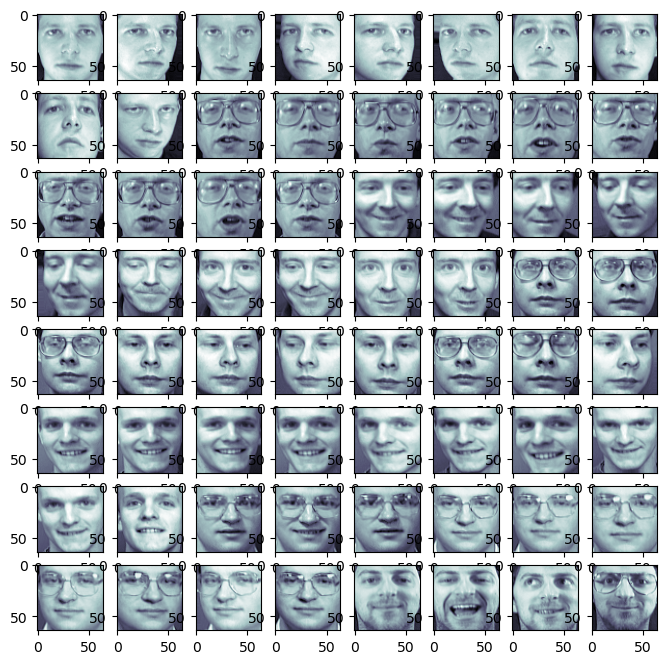

In [8]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [9]:
x = oliv.data
y = oliv.target

In [10]:
pca = PCA()
pca.fit(x)

PCA()

In [11]:
pca.components_.shape

(400, 4096)

In [12]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k = k + 1
k

123

In [13]:
pca = PCA(n_components = k, whiten=True)
transformed_data =pca.fit_transform(x)
transformed_data.shape

(400, 123)

##### reproducing images

In [14]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [15]:
x_approx_images = x_approx.reshape(400,64,64)

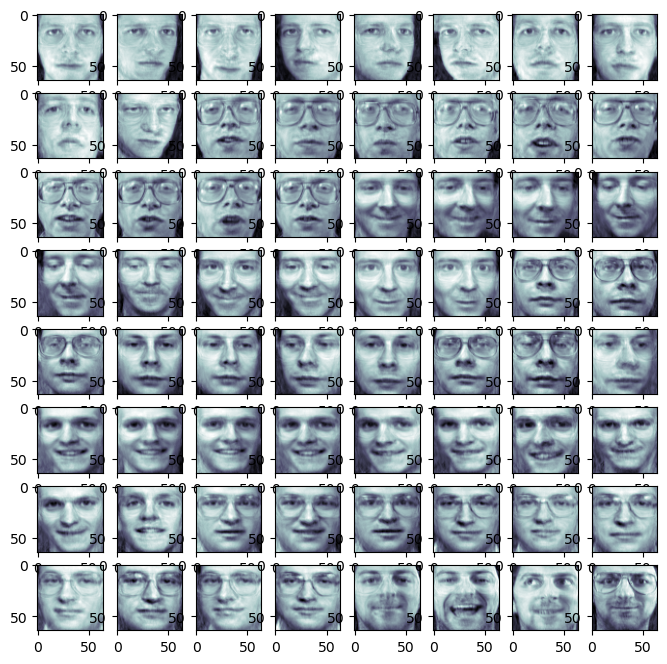

In [16]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [17]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [18]:
eigenfaces = eigenv.reshape((123,64,64))

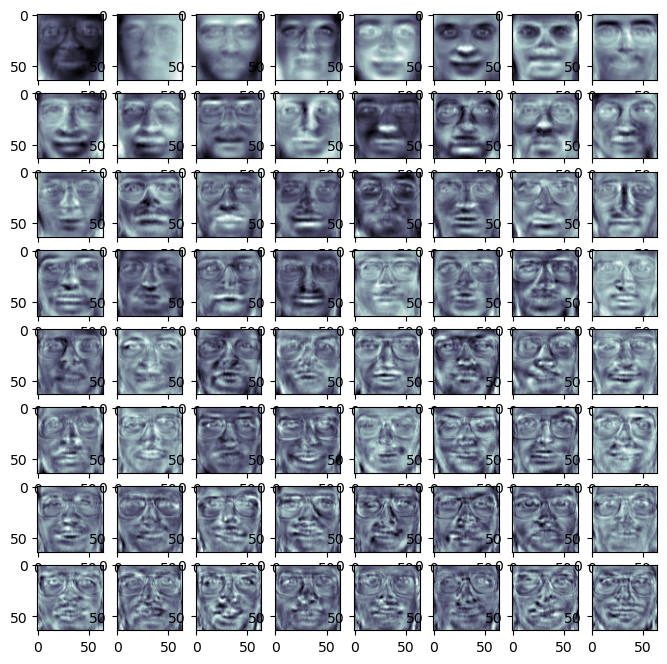

In [19]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

# classification of LFW images

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize=0.4)

In [22]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [23]:
lfw.data.shape

(1140, 1850)

In [24]:
lfw.images.shape

(1140, 50, 37)

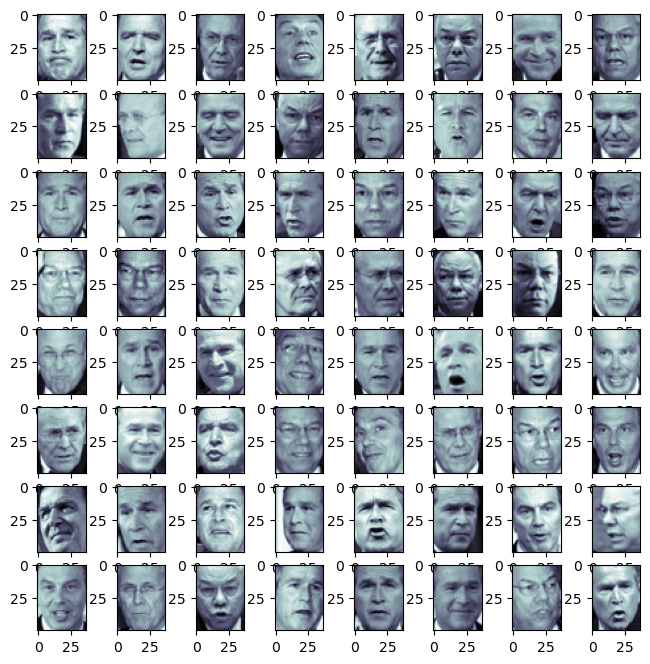

In [25]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap = plt.cm.bone)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
x , y = lfw.data , lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y)
pca_lfw = PCA()
pca_lfw.fit(x_train)

PCA()

In [27]:
k=0
total=0
while total<0.99:
    total = total + pca_lfw.explained_variance_ratio_[k]
    k=k+1
k

356

In [28]:
pca_lfw = PCA(n_components=k,whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 356)

In [29]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

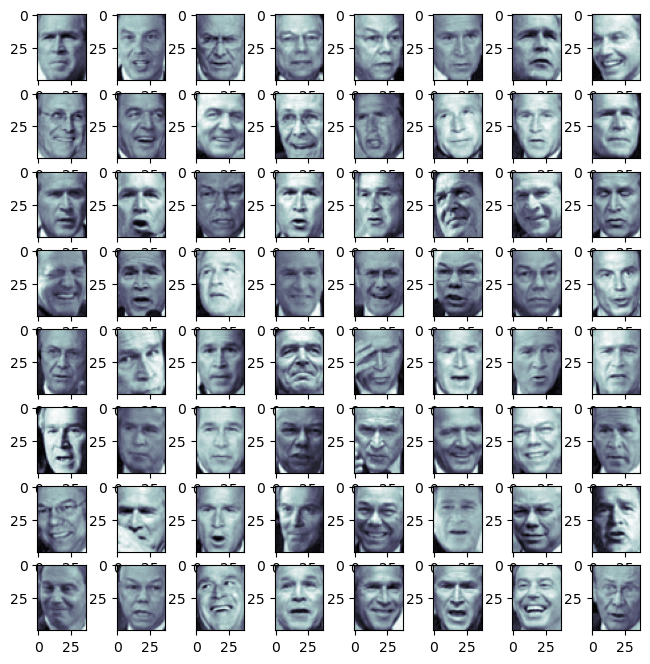

In [30]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [31]:
pca_lfw.components_.shape
eigenv = pca_lfw.components_.reshape(k,50,37)

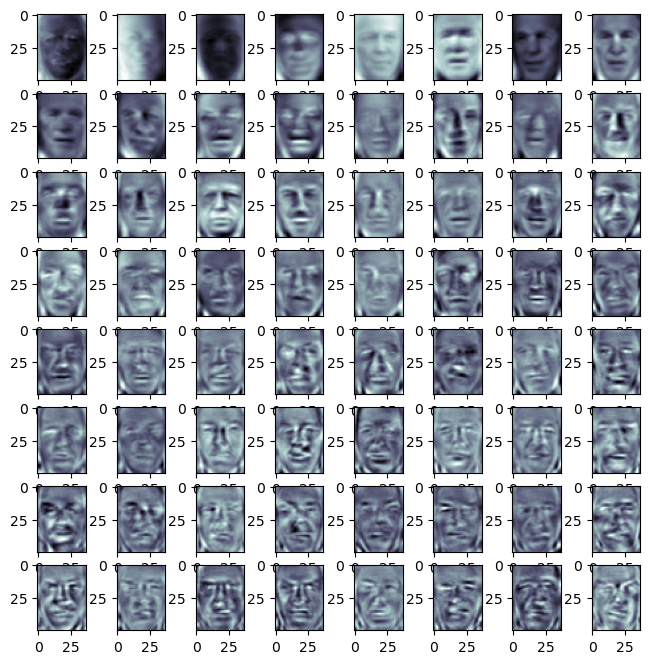

In [32]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenv[i],cmap=plt.cm.bone)
plt.show()

In [33]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rfc.score(x_test,y_test)

0.6701754385964912

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(confusion_matrix(y_test,rfc.predict(x_test)))
print(classification_report(y_test,rfc.predict(x_test)))

[[ 42   2  21   0   0]
 [  3  12  17   1   0]
 [  4   1 120   0   0]
 [  1   0  16   6   3]
 [  5   0  18   2  11]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        65
           1       0.80      0.36      0.50        33
           2       0.62      0.96      0.76       125
           3       0.67      0.23      0.34        26
           4       0.79      0.31      0.44        36

    accuracy                           0.67       285
   macro avg       0.73      0.50      0.55       285
weighted avg       0.70      0.67      0.64       285



In [39]:
rfc = RandomForestClassifier()
rfc.fit(x_train_pca,y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(x_test_pca)
rfc.score(x_test_pca,y_test)

0.49473684210526314

In [41]:
print(confusion_matrix(y_test,rfc.predict(x_test_pca)))
print(classification_report(y_test,rfc.predict(x_test_pca)))

[[ 16   0  49   0   0]
 [  2   1  30   0   0]
 [  4   0 121   0   0]
 [  1   0  25   0   0]
 [  1   0  32   0   3]]
              precision    recall  f1-score   support

           0       0.67      0.25      0.36        65
           1       1.00      0.03      0.06        33
           2       0.47      0.97      0.63       125
           3       0.00      0.00      0.00        26
           4       1.00      0.08      0.15        36

    accuracy                           0.49       285
   macro avg       0.63      0.27      0.24       285
weighted avg       0.60      0.49      0.39       285



C:\Users\yashw\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashw\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashw\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# use svm,other classifier do grid serach to find best parameter
